<a href="https://colab.research.google.com/github/mamsdiallo/SimilarDocuments/blob/master/Find_Similar_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Similar documents

source:

[text similarity](https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50) valuable

[blog](https://blog.exploratory.io/demystifying-text-analytics-finding-similar-documents-with-cosine-similarity-e7b9e5b8e515) valuable

[paper](https://arxiv.org/pdf/1806.03240.pdf)

[article](https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089)

[python coding](https://stackoverflow.com/questions/8897593/how-to-compute-the-similarity-between-two-text-documents) valuable

[Text Similarity Course](https://www.youtube.com/watch?v=GDso6md3DBw) valuable

[kmeans and distance metrics](https://arxiv.org/pdf/1405.7471.pdf)

[text clustering](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html)

In [0]:
import matplotlib.pyplot as plt

In [0]:
import pandas as pd 
#datafile = 'text.csv'
#datafile = 'cat.csv'
#raw_data = pd.read_csv(datafile)
#documents = raw_data.text.values

## Load data source

In [0]:
url = 'https://raw.githubusercontent.com/mamsdiallo/SimilarDocuments/master/text.csv'
raw_data = pd.read_csv(url)
documents = raw_data.text.values

In [0]:
documents[0:2]

array(['Remember the five simple rules to be happy: Free your heart from hatred. Free your mind from worries. Live simply. Give more. Expect less.',
       'Disappointments were not meant to destroy you. They were meant to strengthen you and give you fortitude to accomplish your God-given destiny.'],
      dtype=object)

In [0]:
from textblob import TextBlob

def textblob_tokenizer(str_input):
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [0]:
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer

vectors = TfidfVectorizer(tokenizer=textblob_tokenizer,
                      stop_words='english',
                      use_idf=True)
matrix = vectors.fit_transform(documents)
idf_df = pd.DataFrame(matrix.toarray(), columns=vectors.get_feature_names())
idf_df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

,'d,'m,'re,'s,'ve,accept,accomplish,action,ahead,allow,alway,amaz,anger,ani,anoth,answer,anyon,anyth,apart,apolog,appreci,arriv,ask,aw,bad,battl,beauti,becom,begin,believ,best,better,bigger,braver,busi,ca,calm,care,caution,chang,...,sweet,taller,tear,tell,tend,test,thank,thing,think,time,today,togeth,tomorrow,tri,true,trust,understand,unforgett,unforgiv,valuabl,victori,wait,wake,want,watch,way,weak,whatev,win,winner,wiser,wish,wo,word,work,worri,worst,wrong,ye,yesterday
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.242394,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.301511,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.316873,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.316873,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.277486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277486,0.277486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.277486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.605952,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.562504,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


"""
The warning is trying to tell you that if your text contains "always" it will be normalised to "alway" before matching against your stop list which includes "always" but not "alway". So it won't be removed from your bag of words.

The solution is to make sure that you preprocess your stop list to make sure that it is normalised like your tokens will be, and pass the list of normalised words as stop_words to the vectoriser.
"""

In [0]:
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = matrix * matrix.T
sim = pairwise_similarity.toarray()   
df = pd.DataFrame(sim)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.0,0.0,0.061087,0.0,0.0,0.0,0.068131,0.0,0.0,0.000000,0.059531,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.083281,0.000000,0.0,0.0,0.0,0.057130,0.0,0.0,0.056609,0.0,0.079345,0.0,0.000000,0.0,0.0
1,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.126107,0.000000,0.000000,0.184536,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.095900,0.000000,0.151745,0.0,0.0,0.000000,0.0,0.0,0.00000,0.153878,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.136118,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.061087,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.104647,0.0,0.0,0.027593,0.000000,0.0,0.0,0.0,0.054383,0.095454,0.000000,0.0,0.0,0.033258,0.0,0.0,0.04392,0.000000,0.0,0.041452,0.040743,0.0,0.000000,0.0,0.066408,0.0,0.0,0.0,0.043787,0.0,0.000000,0.0,0.043294,0.059285,0.0,0.0,0.0,0.059399,0.0,0.0,0.131362,0.0,0.151289,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.179925,0.000000,0.0,0.0,0.000000,0.266553,0.0,0.0,0.0,0.000000,0.000000,0.143271,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.177746,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.187147,0.0,0.0


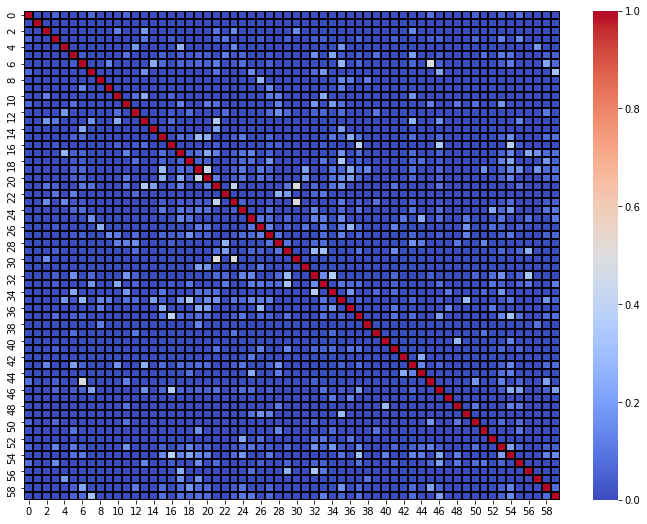

In [0]:
import seaborn as sns

plt.figure(figsize=(12, 9))

sns.heatmap(df,cmap='coolwarm',linecolor='black',linewidth=1)

In [0]:
df.iloc[30:31,21:24]

,21,22,23
30,0.506243,0.0,0.49569


In [0]:
documents[30]

'Losers are those whose words are bigger than actions. Winners are those whose actions are bigger than words.'

In [0]:
documents[21]

'Let your dreams be bigger than your fears, your actions louder than your words, and your faith stronger than your feelings.'

In [0]:
# row bfor doc 30
print(df.iloc[30])

0     0.000000
1     0.000000
2     0.153878
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.506243
22    0.000000
23    0.495690
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
30    1.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
41    0.000000
42    0.000000
43    0.000000
44    0.000000
45    0.000000
46    0.000000
47    0.000000
48    0.000000
49    0.000000
50    0.000000
51    0.000000
52    0.000000
53    0.000000
54    0.000000
55    0.000000
56    0.000000
57    0.000000
58    0.000000
59    0.000000
Name: 30, dtype: float64


In [0]:
df.iloc[0].nlargest(5,keep='all')

0     1.000000
45    0.083281
55    0.079345
7     0.068131
3     0.061087
Name: 0, dtype: float64

In [0]:
documents[0]

'Remember the five simple rules to be happy: Free your heart from hatred. Free your mind from worries. Live simply. Give more. Expect less.'

In [0]:
documents[45]

'Success is not the key to happiness. Happiness is the key to success. If you love what you are doing, you will be successful.'

In [0]:
documents[55]

'My mission: be so busy loving my life that I have no time for hate, regret, worrying, fret, or fear.'

In [0]:
documents[7]

'Risk more than others think is safe. Dream more than others think is practical. Expect more than others think is possible.'

In [0]:
idx = df.iloc[0].nlargest(3,keep='all')

In [0]:
type(idx)

pandas.core.series.Series

In [0]:
print(idx.index)

Int64Index([0, 45, 55], dtype='int64')


In [0]:
def getClosest(df,n):
    idx = df.iloc[n].nlargest(3,keep='all').index
    return idx

In [0]:
getClosest(df,3)

Int64Index([3, 55, 53], dtype='int64')

In [0]:
type(getClosest(df,3))

pandas.core.indexes.numeric.Int64Index

## Measure clustering

In [0]:
from sklearn.neighbors import BallTree
import numpy as np
from random import sample
import pandas as pd


def hopkins(D, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    D : numpy array 
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(D) == np.ndarray:
        D = pd.DataFrame(D)
        print("it is a np.ndarray")

    # Sample n observations from D : P

    if sampling_size > D.shape[0]:
        raise Exception(
            'The number of sample of sample is superieur than the shape of D')

    P = D.sample(n=sampling_size)

    # Get the distance to their neirest neighbors in D : X

    tree = BallTree(D, leaf_size=2)
    dist, _ = tree.query(P, k=2)
    X = dist[:, 1]

    # Randomly simulate n points with the same variation as in D : Q. 

    max_D = D.max()
    min_D = D.min()

    matrix = np.column_stack((np.random.uniform(
        min_D[0], max_D[0], sampling_size), np.random.uniform(min_D[1], max_D[1], sampling_size)))
    if len(max_D) >= 2:
        for i in range(2, len(max_D)):
            matrix = np.column_stack(
                (matrix, np.random.uniform(min_D[i], max_D[i], sampling_size)))
    Q = pd.DataFrame(matrix)

    # Get the distance to their neirest neighbors in D : Y

    tree = BallTree(D, leaf_size=2)
    dist, _ = tree.query(Q, k=1)
    Y = dist

    # return the hopkins score

    x = sum(X)
    y = sum(Y)

    if (x+y == 0):
        raise Exception('The denominator of the hopkins statistics is null')

    return x/(x+y)[0]

In [0]:
matrix.shape

(60, 255)

In [0]:
type(matrix.toarray())

numpy.ndarray

In [0]:
matrix.shape[0]

60

In [0]:
hopkins(matrix.toarray(),matrix.shape[0])

it is a np.ndarray


0.24397358335783745

Since we obtained Hopkins statistic of less then 0.5 which is equal to 0.244 we can say that the structures in the data set are not random and are real structures out of which clusters can be formed.

## Normalizing

In [0]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(matrix.toarray())

## Clustering with KMEANS

In [0]:
# Dimensions to display
k = 2

In [0]:
# Empirism: number of clusters
# 𝑘=nth square root(𝑀) for a data-set with M are dimensions and N data-points

In [0]:
# KMeans clustering a kind of clustering.
from sklearn.cluster import KMeans

true_k=15
km = KMeans(n_clusters=true_k,init='k-means++',random_state=1,n_init=100)
# Normally people fit the matrix
km.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [0]:
labels = km.labels_

### Iterate Over Several Values of K

In [0]:
max_k = len(documents) # too much

In [0]:
max_k = 30

In [0]:
number_clusters = range(1, max_k)

kmeans = [KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=1) for i in number_clusters]

#kmeans

score = [kmeans[i].fit(X_std).score(X_std) for i in range(len(kmeans))]
#score

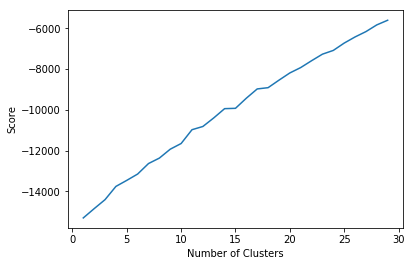

In [0]:
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

## Dimension reduction (PCA)

resource:

[PCA](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) valuable

In [0]:
print(X_std)

[[-0.13018891 -0.13018891 -0.22847205 ... -0.13018891 -0.13018891
  -0.13018891]
 [-0.13018891 -0.13018891 -0.22847205 ... -0.13018891 -0.13018891
  -0.13018891]
 [-0.13018891 -0.13018891 -0.22847205 ... -0.13018891 -0.13018891
  -0.13018891]
 ...
 [-0.13018891 -0.13018891 -0.22847205 ... -0.13018891 -0.13018891
  -0.13018891]
 [-0.13018891 -0.13018891 -0.22847205 ... -0.13018891 -0.13018891
  -0.13018891]
 [-0.13018891 -0.13018891 -0.22847205 ... -0.13018891 -0.13018891
  -0.13018891]]


In [0]:
#X = matrix.toarray()

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.components_)

[[-1.96072051e-02  5.61971221e-03  1.44574751e-03 ... -1.34262951e-02
  -9.74486368e-03 -1.18492871e-02]
 [-1.45929884e-02  2.76084950e-03 -2.56062621e-02 ... -7.81819651e-03
  -3.34488371e-03 -8.40770758e-03]
 [-1.51203896e-01  1.84727855e-03 -1.76728539e-02 ... -2.69273053e-02
   5.08735146e-03  3.66664223e-03]
 ...
 [ 9.34082751e-02  1.68237485e-02  2.72643427e-02 ... -4.53646849e-02
   2.09612426e-02 -2.24856700e-04]
 [-1.99549300e-02 -1.65077033e-03  1.80593218e-01 ...  1.00135055e-02
   1.31952666e-03  2.28151319e-01]
 [ 1.92944876e-02 -1.02015370e-03  1.36524543e-01 ... -4.58420707e-02
  -1.12234339e-01  1.03879395e-01]]


In [0]:
print(pca.explained_variance_.shape)

(10,)


In [0]:
print(pca.components_.shape)

(10, 255)


In [0]:
print(pca.mean_.shape)

(255,)


In [0]:
X_pca = pca.transform(X_std)
print("original shape:   ", X_std.shape)
print("transformed shape:", X_pca.shape)

original shape:    (60, 255)
transformed shape: (60, 10)


"""
The transformed data has been reduced to a single dimension. To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:
"""

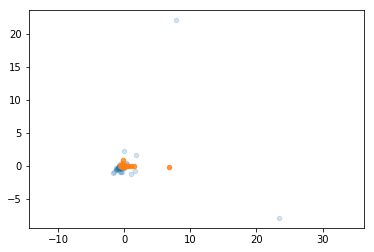

In [0]:
#%matplotlib inline
#%matplotlib notebook
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2,s=20)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8,s=20)
plt.axis('equal')
plt.show()

In [0]:
labels = km.labels_
print(labels)

[10  2  4  6  4  1  4  1  4  4  4  4  9 11  4  4  4  4  4  4  4 11  1 11
  4  8  4  4  1 12 11  4  1  1  1  4  4  4 13  0  7  1  4  4  4  4  4 14
  5  4  4  4  4  4  4  4  1  3  4  4]


In [0]:
#import colormaps as cmaps
plt.register_cmap(name='spectral', cmap=plt.cm.Spectral)
plt.set_cmap(plt.cm.Spectral)

<Figure size 432x288 with 0 Axes>

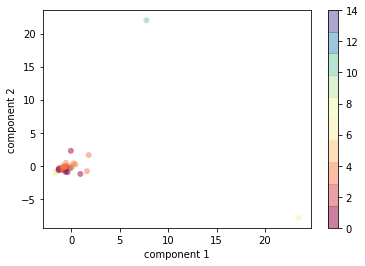

In [0]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

In [0]:
X_pca[:2,:]

array([[ 7.77700658e+00,  2.19952613e+01, -2.72621046e-01,
         5.19812931e-01,  1.14568731e+00, -1.42084206e+00,
        -1.29637263e-01,  6.84906760e-01,  2.35193720e-01,
        -6.08263136e-03],
       [-1.23448656e+00, -3.46914902e-01,  1.95283046e+01,
         9.37744601e+00,  1.53687219e+00, -1.11001767e+00,
        -1.97150931e-01,  1.89010880e+00,  2.68656385e-01,
         3.38281292e-01]])

In [0]:
df3D = pd.DataFrame(X_pca,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])
df3D.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,7.777007,21.995261,-0.272621,0.519813,1.145687,-1.420842,-0.129637,0.684907,0.235194,-0.006083
1,-1.234487,-0.346915,19.528305,9.377446,1.536872,-1.110018,-0.197151,1.890109,0.268656,0.338281
2,-0.738270,-0.194703,0.279827,-0.729550,-0.499630,0.320562,0.705253,-3.466875,-2.178202,1.043223
3,23.456552,-7.885279,0.324705,0.408682,0.741352,-0.227275,0.968725,-0.034549,-0.594726,-0.671843
4,-0.592197,-0.170031,-0.012117,-0.416923,1.116584,0.267602,-0.020162,-0.753224,-0.685902,-0.757754


In [0]:
df3D['target'] = labels
df3D.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,7.777007,21.995261,-0.272621,0.519813,1.145687,-1.420842,-0.129637,0.684907,0.235194,-0.006083,10
1,-1.234487,-0.346915,19.528305,9.377446,1.536872,-1.110018,-0.197151,1.890109,0.268656,0.338281,2
2,-0.738270,-0.194703,0.279827,-0.729550,-0.499630,0.320562,0.705253,-3.466875,-2.178202,1.043223,4
3,23.456552,-7.885279,0.324705,0.408682,0.741352,-0.227275,0.968725,-0.034549,-0.594726,-0.671843,6
4,-0.592197,-0.170031,-0.012117,-0.416923,1.116584,0.267602,-0.020162,-0.753224,-0.685902,-0.757754,4


In [0]:
df2D = df3D.drop('PC3',axis=1)
df2D.head()

,PC1,PC2,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,7.777007,21.995261,0.519813,1.145687,-1.420842,-0.129637,0.684907,0.235194,-0.006083,10
1,-1.234487,-0.346915,9.377446,1.536872,-1.110018,-0.197151,1.890109,0.268656,0.338281,2
2,-0.738270,-0.194703,-0.729550,-0.499630,0.320562,0.705253,-3.466875,-2.178202,1.043223,4
3,23.456552,-7.885279,0.408682,0.741352,-0.227275,0.968725,-0.034549,-0.594726,-0.671843,6
4,-0.592197,-0.170031,-0.416923,1.116584,0.267602,-0.020162,-0.753224,-0.685902,-0.757754,4


## Visualisation

Text(0, 0.5, 'PC2')

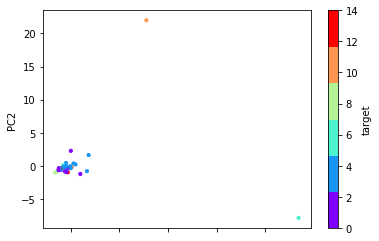

In [0]:
# Plot our scatter
ax = df2D.plot(kind='scatter',x='PC1', y='PC2', s=10,c='target', cmap=plt.cm.get_cmap('rainbow', 6))
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

Text(0, 0.5, 'PC3')

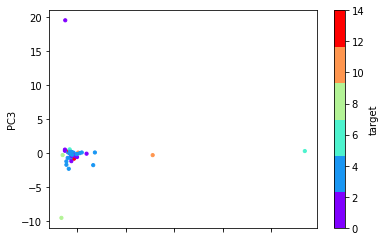

In [0]:
# Plot our scatter
ax = df3D.plot(kind='scatter',x='PC1', y='PC3', s=10,c='target', cmap=plt.cm.get_cmap('rainbow', 6))
ax.set_xlabel("PC1")
ax.set_ylabel("PC3")

Text(0, 0.5, 'PC3')

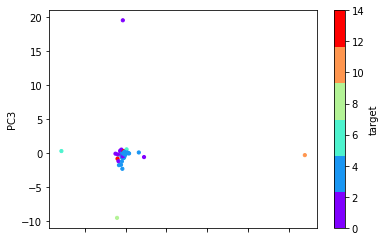

In [0]:
# Plot our scatter
ax = df3D.plot(kind='scatter',x='PC2', y='PC3', s=10,c='target', cmap=plt.cm.get_cmap('rainbow', 6))
ax.set_xlabel("PC2")
ax.set_ylabel("PC3")

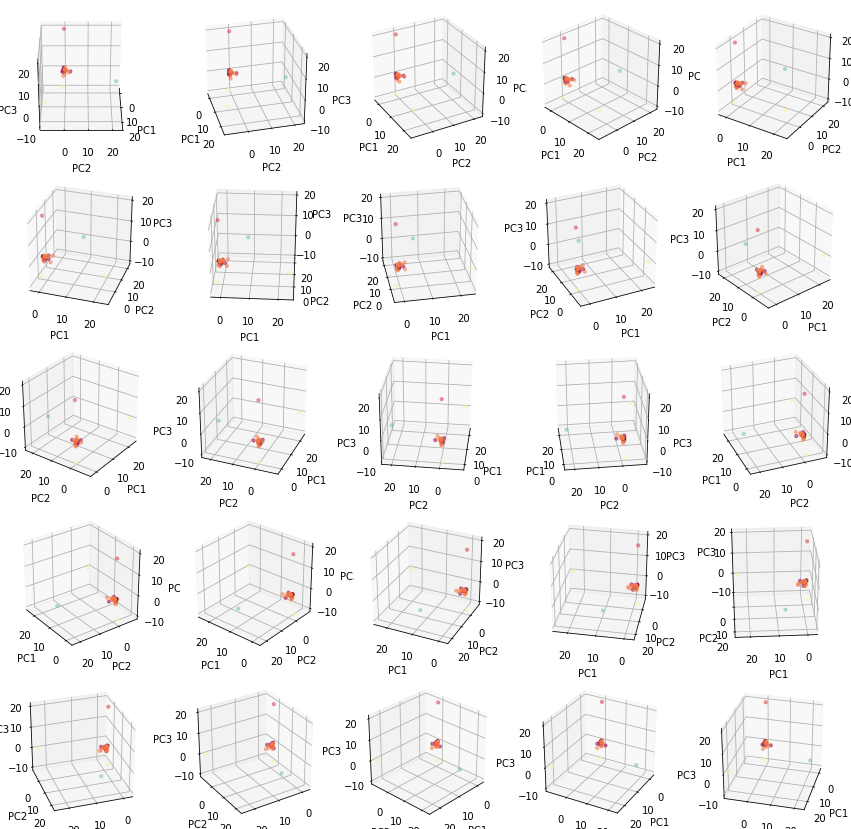

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw(ax, df):
    #colormap = { 0: 'purple', 1: 'green', 2: 'red' }
    #colors = df.apply(lambda row: colormap[row.target], axis=1)

    ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=labels, s=10, alpha=0.5,cmap=plt.cm.get_cmap('spectral', 10))
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')

chart_count_vert = 5
chart_count_horiz = 5
number_of_graphs = chart_count_vert * chart_count_horiz

fig = plt.figure(figsize=(3 * chart_count_horiz, 3 * chart_count_vert))

for i in range(number_of_graphs):
    ax = fig.add_subplot(chart_count_horiz, chart_count_vert, i + 1, projection='3d', azim=(-360 / number_of_graphs) * i)
    draw(ax, df3D)

## Clustering with Hierarchical

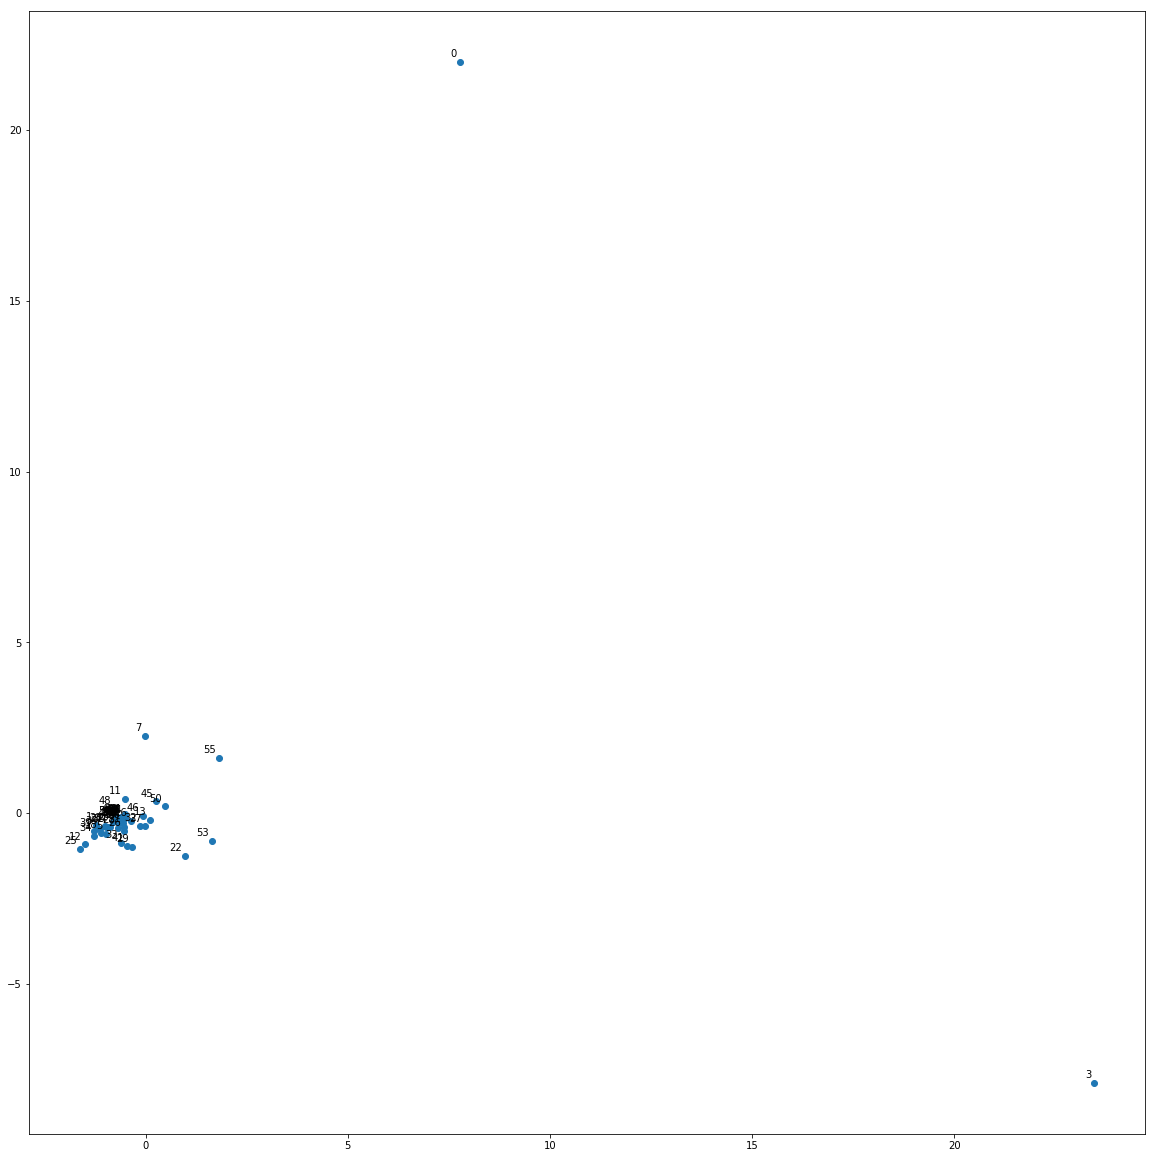

In [0]:
labels = range(0, 59)  
plt.figure(figsize=(20, 20))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X_pca[:,0],X_pca[:,1], label='True Position')

for label, xi, yi in zip(labels, X_pca[:, 0], X_pca[:, 1]):  
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

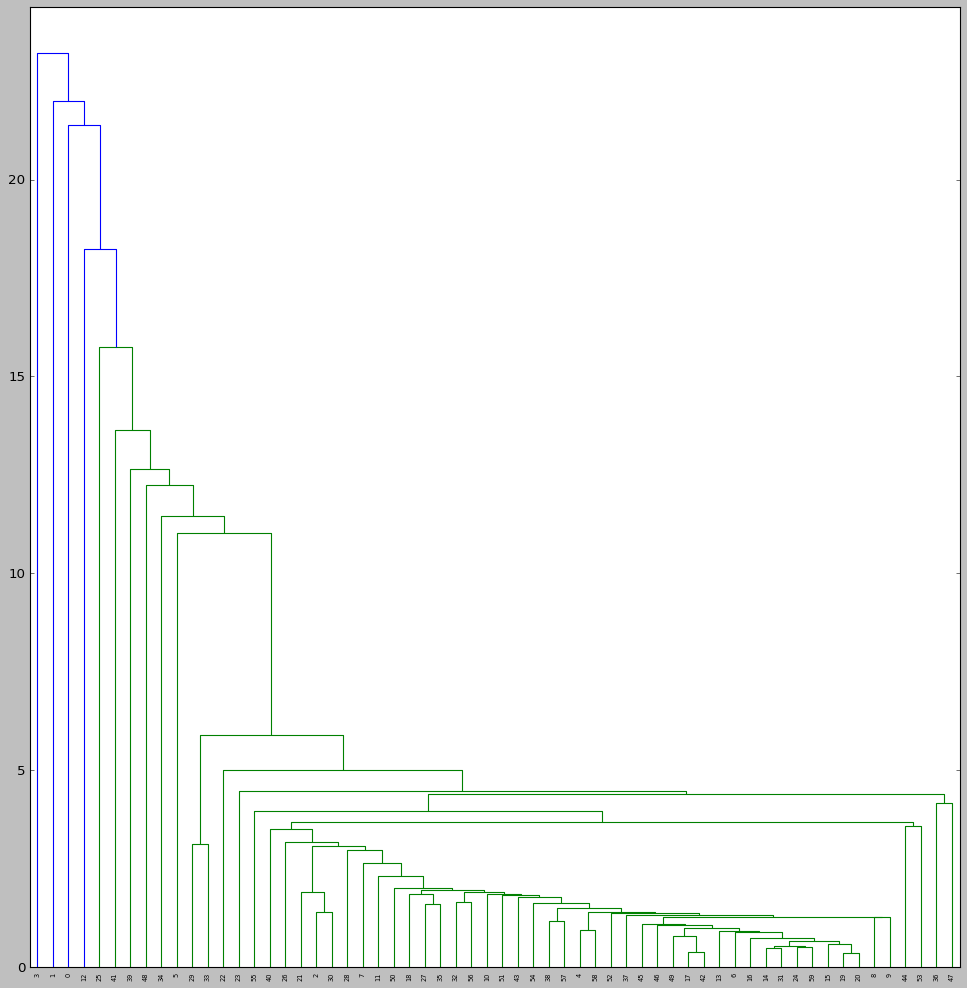

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
plt.style.use('classic')

linked = linkage(X_pca, 'single')

labelList = range(0, 60)

plt.figure(figsize=(15, 15))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

Numbers: 1, 2, 4, 13 (0,1,3,12)
Are the most isolated

In [0]:
documents[3]

'Life is short, live it. Love is rare, grab it. Anger is bad, dump it. Fear is awful, face it. Memories are sweet, cherish them.'

In [0]:
df.iloc[3].nlargest(5,keep='all')

3     1.000000
55    0.151289
53    0.131362
13    0.104647
22    0.095454
Name: 3, dtype: float64

In [0]:
documents[55]

'My mission: be so busy loving my life that I have no time for hate, regret, worrying, fret, or fear.'

In [0]:
documents[1]

'Disappointments were not meant to destroy you. They were meant to strengthen you and give you fortitude to accomplish your God-given destiny.'

In [0]:
df.iloc[1].nlargest(5)

1    1.0
0    0.0
2    0.0
3    0.0
4    0.0
Name: 1, dtype: float64

In [0]:
documents[0]

'Remember the five simple rules to be happy: Free your heart from hatred. Free your mind from worries. Live simply. Give more. Expect less.'

In [0]:
df.iloc[0].nlargest(5)

0     1.000000
45    0.083281
55    0.079345
7     0.068131
3     0.061087
Name: 0, dtype: float64

In [0]:
documents[45]

'Success is not the key to happiness. Happiness is the key to success. If you love what you are doing, you will be successful.'